In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
with open("../data/expenses.csv", "r", encoding="utf-8") as f:
    print(f.read())

In [5]:
csv_text = """date,amount,category,note,payment_method
2025-10-01,320,rent,stanza,bank
2025-10-02,35.50,groceries,supermercato,card
2025-10-03,2.50,transport,bus,card
2025-10-04,18.00,eating_out,pizza,card
2025-10-05,45.00,groceries,spesa settimanale,card
2025-10-06,12.00,leisure,caffe e bar,card
2025-10-07,30.00,university,dispense,card
2025-10-08,2.50,transport,bus,card
2025-10-09,20.00,eating_out,panino,card
2025-10-10,40.00,bills,telefono,card
"""

with open("../data/expenses.csv", "w", encoding="utf-8") as f:
    f.write(csv_text)

print("OK: file expenses.csv scritto correttamente")

OK: file expenses.csv scritto correttamente


In [6]:
with open("../data/expenses.csv", "r", encoding="utf-8") as f:
    print(f.read())

date,amount,category,note,payment_method
2025-10-01,320,rent,stanza,bank
2025-10-02,35.50,groceries,supermercato,card
2025-10-03,2.50,transport,bus,card
2025-10-04,18.00,eating_out,pizza,card
2025-10-05,45.00,groceries,spesa settimanale,card
2025-10-06,12.00,leisure,caffe e bar,card
2025-10-07,30.00,university,dispense,card
2025-10-08,2.50,transport,bus,card
2025-10-09,20.00,eating_out,panino,card
2025-10-10,40.00,bills,telefono,card



In [21]:
start = "2025-01-01"
end   = "2025-12-31"
dates = pd.date_range(start, end, freq="D")

rows = []

# Parametri "medi" (puoi cambiarli)
RENT = 320.00            # affitto mensile (giorno 1)
BILLS = 40.00            # bollette mensili (giorno 10)
UNI = 25.00              # università 2 volte al mese (giorni 5 e 20)
GROCERIES = 35.00        # spesa 2 volte a settimana
TRANSPORT = 2.50         # trasporti 3 volte a settimana
EATING_OUT = 12.00       # uscita a mangiare 1 volta a settimana
LEISURE = 8.00           # leisure 1 volta a settimana

for d in dates:
    # Mensili
    if d.day == 1:
        rows.append([d, RENT, "rent", "stanza", "bank"])
    if d.day == 10:
        rows.append([d, BILLS, "bills", "telefono", "card"])
    if d.day in [5, 20]:
        rows.append([d, UNI, "university", "materiale", "card"])

    # Settimanali (logica fissa: basata sul giorno della settimana)
    # 0=lunedì ... 6=domenica
    dow = d.dayofweek

    # Spesa: martedì e venerdì
    if dow in [1, 4]:
        rows.append([d, GROCERIES, "groceries", "supermercato", "card"])

    # Trasporti: lun, mer, ven
    if dow in [0, 2, 4]:
        rows.append([d, TRANSPORT, "transport", "bus", "card"])

    # Eating out: sabato
    if dow == 5:
        rows.append([d, EATING_OUT, "eating_out", "fuori", "card"])

    # Leisure: domenica
    if dow == 6:
        rows.append([d, LEISURE, "leisure", "bar/altro", "card"])

# Costruisci il DataFrame
df = pd.DataFrame(rows, columns=["date", "amount", "category", "note", "payment_method"])
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")

print("OK - righe dataset:", len(df))
df.head()

OK - righe dataset: 413


,date,amount,category,note,payment_method,month
0,2025-01-01,320.0,rent,stanza,bank,2025-01
1,2025-01-01,2.5,transport,bus,card,2025-01
2,2025-01-03,35.0,groceries,supermercato,card,2025-01
3,2025-01-03,2.5,transport,bus,card,2025-01
4,2025-01-04,12.0,eating_out,fuori,card,2025-01


In [8]:
category_total = df.groupby("category")["amount"].sum().sort_values()
category_total

category
transport       5.0
leisure        12.0
university     30.0
eating_out     38.0
bills          40.0
groceries      80.5
rent          320.0
Name: amount, dtype: float64

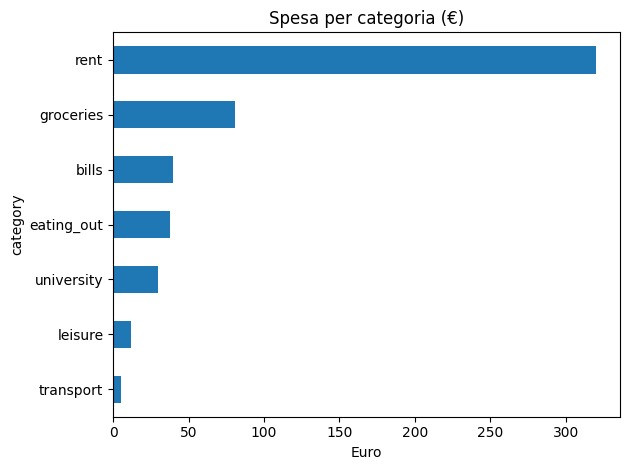

In [9]:
category_total.plot(kind="barh", title="Spesa per categoria (€)")
plt.xlabel("Euro")
plt.tight_layout()
plt.show()

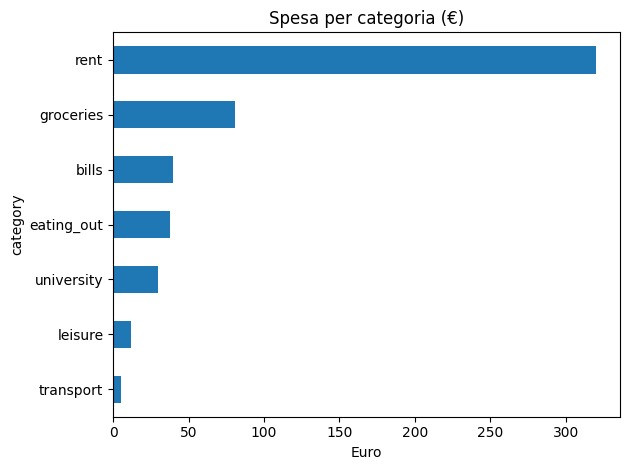

In [10]:
category_total.plot(kind="barh", title="Spesa per categoria (€)")
plt.xlabel("Euro")
plt.tight_layout()
plt.savefig("../results/category_breakdown.png")
plt.show()

In [11]:
total_spent = df["amount"].sum()
days_covered = df["date"].nunique()
avg_per_day = total_spent / days_covered

print(f"Totale speso (nel dataset): €{total_spent:.2f}")
print(f"Giorni coperti: {days_covered}")
print(f"Spesa media al giorno: €{avg_per_day:.2f}")

Totale speso (nel dataset): €525.50
Giorni coperti: 10
Spesa media al giorno: €52.55


In [12]:
category_total = df.groupby("category")["amount"].sum().sort_values(ascending=False)
category_pct = (category_total / category_total.sum() * 100).round(1)

summary = pd.DataFrame({
    "euro": category_total.round(2),
    "percentuale_%": category_pct
})

summary

,euro,percentuale_%
category,,
rent,320.0,60.9
groceries,80.5,15.3
bills,40.0,7.6
eating_out,38.0,7.2
university,30.0,5.7
leisure,12.0,2.3
transport,5.0,1.0


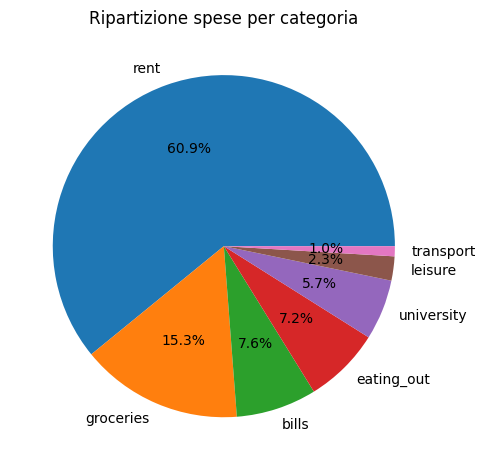

In [13]:
summary["euro"].plot(kind="pie", autopct="%1.1f%%", ylabel="", title="Ripartizione spese per categoria")
plt.tight_layout()
plt.savefig("../results/category_pie.png")
plt.show()

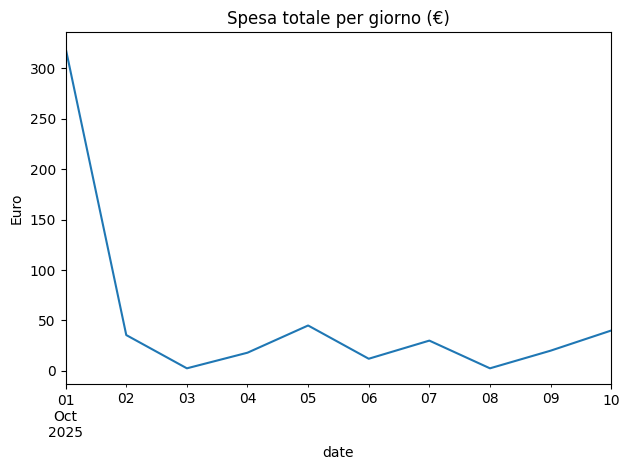

In [14]:
daily = df.groupby("date")["amount"].sum()

daily.plot(title="Spesa totale per giorno (€)")
plt.ylabel("Euro")
plt.tight_layout()
plt.savefig("../results/daily_spending.png")
plt.show()

In [15]:
scenarios = {
    "base": {},
    "rent +10%": {"rent": 1.10},
    "social life": {"eating_out": 1.30, "leisure": 1.20},
}

In [16]:
def apply_scenario(df, multipliers):
    df2 = df.copy()
    m = df2["category"].map(multipliers).fillna(1.0)
    df2["amount_scn"] = df2["amount"] * m
    return df2["amount_scn"].sum()

scenario_totals = {name: apply_scenario(df, mult) for name, mult in scenarios.items()}
scenario_totals

{'base': np.float64(525.5),
 'rent +10%': np.float64(557.5),
 'social life': np.float64(539.3)}

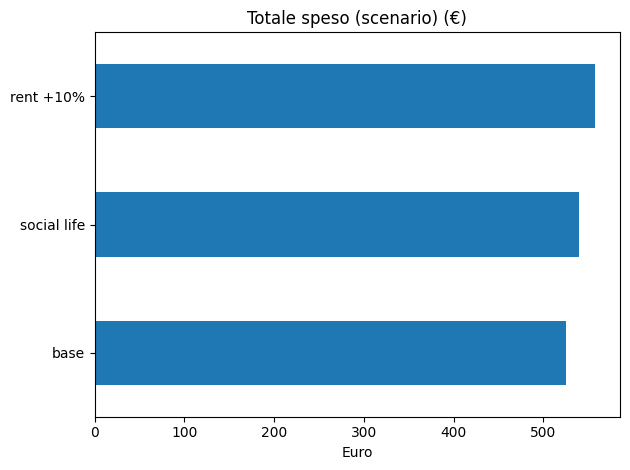

In [17]:
pd.Series(scenario_totals).sort_values().plot(kind="barh", title="Totale speso (scenario) (€)")
plt.xlabel("Euro")
plt.tight_layout()
plt.savefig("../results/scenario_comparison.png")
plt.show()

In [18]:
budget = 800  

fixed_cats = ["rent", "bills", "university"]
fixed = df[df["category"].isin(fixed_cats)]["amount"].sum()
variable_daily = df[~df["category"].isin(fixed_cats)].groupby("date")["amount"].sum()

print(f"Spese fisse (dataset): €{fixed:.2f}")
print(f"Spese variabili (giornaliere) - media: €{variable_daily.mean():.2f}")

Spese fisse (dataset): €390.00
Spese variabili (giornaliere) - media: €19.36


In [19]:
import numpy as np

np.random.seed(42)
n_sim = 10000

# bootstrap: prende giorni "a caso" dai tuoi giorni reali e li somma
days_in_data = len(variable_daily)
sim_variable = np.array([
    np.random.choice(variable_daily.values, size=days_in_data, replace=True).sum()
    for _ in range(n_sim)
])

sim_total = fixed + sim_variable
prob_over = (sim_total > budget).mean()

print(f"Probabilità di sforare budget €{budget}: {prob_over*100:.1f}%")
print(f"Totale simulato - p50: €{np.percentile(sim_total,50):.0f}, p90: €{np.percentile(sim_total,90):.0f}, p95: €{np.percentile(sim_total,95):.0f}")

Probabilità di sforare budget €800: 0.0%
Totale simulato - p50: €526, p90: €578, p95: €593


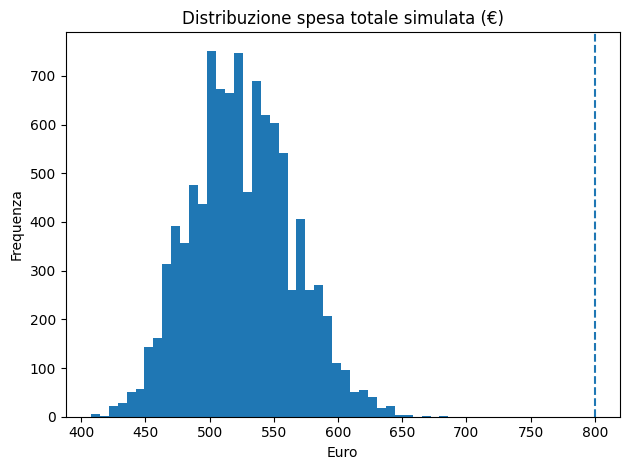

In [20]:
plt.hist(sim_total, bins=40)
plt.axvline(budget, linestyle="--")
plt.title("Distribuzione spesa totale simulata (€)")
plt.xlabel("Euro")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.savefig("../results/budget_risk.png")
plt.show()

In [22]:
df.to_csv("../data/expenses_12months_avg.csv", index=False)
print("Salvato in data/expenses_12months_avg.csv")

Salvato in data/expenses_12months_avg.csv


month
2025-01    840.0
2025-02    800.0
2025-03    822.5
2025-04    837.5
2025-05    849.5
2025-06    810.5
2025-07    837.5
2025-08    857.5
2025-09    837.5
2025-10    840.0
2025-11    820.0
2025-12    840.0
Freq: M, Name: amount, dtype: float64


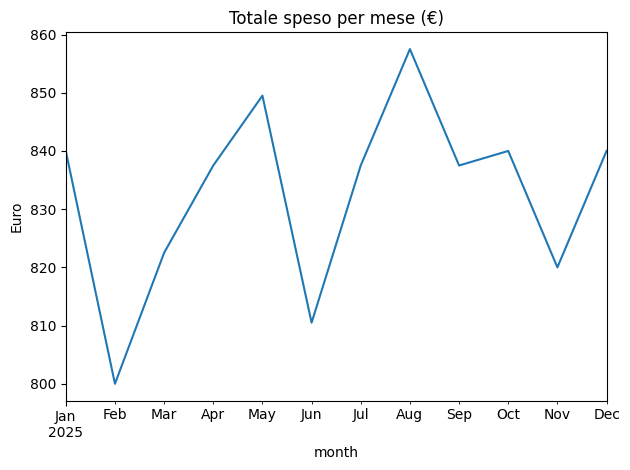

In [23]:
monthly_total = df.groupby("month")["amount"].sum()

print(monthly_total)

monthly_total.plot(title="Totale speso per mese (€)")
plt.ylabel("Euro")
plt.tight_layout()
plt.savefig("../results/monthly_total.png")
plt.show()

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  PARAMETRI 
rent_increase_pct = 0.10         # +10% affitto
increase_from_month = "2025-06"  # da questo mese in poi 
budget = 950     
n_sim = 10000                    # numero simulazioni
days_in_month = 30               


print("Categorie:", sorted(df["category"].unique()))

Categorie: ['bills', 'eating_out', 'groceries', 'leisure', 'rent', 'transport', 'university']


In [28]:
# Separo affitto e non-affitto
rent_df = df[df["category"] == "rent"].copy()
nonrent_df = df[df["category"] != "rent"].copy()

# Affitto base (mensile): prendiamo la media dei mesi presenti
rent_monthly_base = rent_df.groupby("month")["amount"].sum()
base_rent = float(rent_monthly_base.mean())

# Spese non affitto giornaliere (somma per giorno)
nonrent_daily = nonrent_df.groupby("date")["amount"].sum()

print(f"Affitto base stimato: €{base_rent:.2f}")
print(f"Giorni disponibili per spese non-affitto: {len(nonrent_daily)}")

Affitto base stimato: €320.00
Giorni disponibili per spese non-affitto: 319


In [29]:
np.random.seed(42)

# Simuliamo componente non-affitto mensile
sim_nonrent = np.array([
    np.random.choice(nonrent_daily.values, size=days_in_month, replace=True).sum()
    for _ in range(n_sim)
])

rent_after = base_rent * (1 + rent_increase_pct)

sim_total_before = base_rent + sim_nonrent
sim_total_after  = rent_after + sim_nonrent

# Probabilità di sforare il budget
p_over_before = (sim_total_before > budget).mean()
p_over_after  = (sim_total_after  > budget).mean()

# Impatto medio e quantili dell'aumento
delta = sim_total_after - sim_total_before

print(f"Budget: €{budget:.0f}")
print(f"Prob. sforamento PRIMA: {p_over_before*100:.1f}%")
print(f"Prob. sforamento DOPO : {p_over_after*100:.1f}%")
print(f"Aumento medio mensile stimato: €{delta.mean():.2f}")
print(f"Aumento (p50/p90/p95): €{np.percentile(delta,50):.2f} / €{np.percentile(delta,90):.2f} / €{np.percentile(delta,95):.2f}")

Budget: €950
Prob. sforamento PRIMA: 27.7%
Prob. sforamento DOPO : 39.8%
Aumento medio mensile stimato: €32.00
Aumento (p50/p90/p95): €32.00 / €32.00 / €32.00


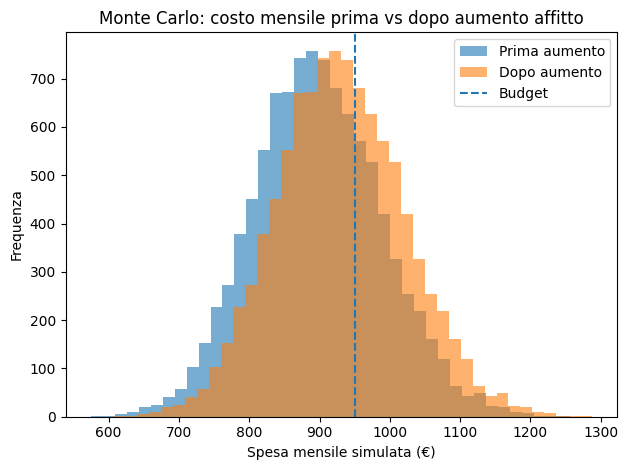

In [30]:
plt.hist(sim_total_before, bins=40, alpha=0.6, label="Prima aumento")
plt.hist(sim_total_after,  bins=40, alpha=0.6, label="Dopo aumento")
plt.axvline(budget, linestyle="--", label="Budget")
plt.title("Monte Carlo: costo mensile prima vs dopo aumento affitto")
plt.xlabel("Spesa mensile simulata (€)")
plt.ylabel("Frequenza")
plt.legend()
plt.tight_layout()
plt.savefig("../results/rent_increase_montecarlo.png")
plt.show()

In [31]:
df.to_csv("../data/expenses_12months_avg.csv", index=False)

In [32]:
import pandas as pd

def generate_dataset(start="2025-01-01", end="2025-12-31"):
    dates = pd.date_range(start, end, freq="D")
    rows = []

    # valori medi (modificabili)
    RENT = 320.00
    BILLS = 40.00
    UNI = 25.00
    GROCERIES = 35.00
    TRANSPORT = 2.50
    EATING_OUT = 12.00
    LEISURE = 8.00

    for d in dates:
        # mensili
        if d.day == 1:
            rows.append([d, RENT, "rent", "stanza", "bank"])
        if d.day == 10:
            rows.append([d, BILLS, "bills", "telefono", "card"])
        if d.day in [5, 20]:
            rows.append([d, UNI, "university", "materiale", "card"])

        # settimanali (logica fissa)
        dow = d.dayofweek  # 0 lun ... 6 dom
        if dow in [1, 4]:  # mar, ven
            rows.append([d, GROCERIES, "groceries", "supermercato", "card"])
        if dow in [0, 2, 4]:  # lun, mer, ven
            rows.append([d, TRANSPORT, "transport", "bus", "card"])
        if dow == 5:  # sab
            rows.append([d, EATING_OUT, "eating_out", "fuori", "card"])
        if dow == 6:  # dom
            rows.append([d, LEISURE, "leisure", "bar/altro", "card"])

    df = pd.DataFrame(rows, columns=["date", "amount", "category", "note", "payment_method"])
    df["date"] = pd.to_datetime(df["date"])
    df["month"] = df["date"].dt.to_period("M")
    return df

if __name__ == "__main__":
    df = generate_dataset()
    df.to_csv("../data/expenses_12months_avg.csv", index=False)
    print("Saved: data/expenses_12months_avg.csv")

Saved: data/expenses_12months_avg.csv


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def run_analysis(csv_path="../data/expenses_12months_avg.csv"):
    df = pd.read_csv(csv_path)
    df["date"] = pd.to_datetime(df["date"])
    df["month"] = df["date"].dt.to_period("M")

    # Totale per categoria
    category_total = df.groupby("category")["amount"].sum().sort_values()
    category_total.plot(kind="barh", title="Spesa per categoria (€)")
    plt.xlabel("Euro")
    plt.tight_layout()
    plt.savefig("../results/category_breakdown.png")
    plt.close()

    # Percentuali per categoria
    category_total.plot(kind="pie", autopct="%1.1f%%", ylabel="", title="Ripartizione spese per categoria")
    plt.tight_layout()
    plt.savefig("../results/category_pie.png")
    plt.close()

    # Totale mensile
    monthly_total = df.groupby("month")["amount"].sum()
    monthly_total.plot(title="Totale speso per mese (€)")
    plt.ylabel("Euro")
    plt.tight_layout()
    plt.savefig("../results/monthly_total.png")
    plt.close()

    print("Saved charts in results/")
    return df, category_total, monthly_total

if __name__ == "__main__":
    run_analysis()

Saved charts in results/


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def montecarlo_rent_increase(
    csv_path="../data/expenses_12months_avg.csv",
    rent_increase_pct=0.35,
    budget=1200,
    n_sim=10000,
    days_in_month=30
):
    df = pd.read_csv(csv_path)
    df["date"] = pd.to_datetime(df["date"])
    df["month"] = df["date"].dt.to_period("M")

    rent_df = df[df["category"] == "rent"]
    nonrent_df = df[df["category"] != "rent"]

    base_rent = float(rent_df.groupby("month")["amount"].sum().mean())
    nonrent_daily = nonrent_df.groupby("date")["amount"].sum()

    np.random.seed(42)
    sim_nonrent = np.array([
        np.random.choice(nonrent_daily.values, size=days_in_month, replace=True).sum()
        for _ in range(n_sim)
    ])

    rent_after = base_rent * (1 + rent_increase_pct)
    sim_total_before = base_rent + sim_nonrent
    sim_total_after  = rent_after + sim_nonrent

    p_over_before = (sim_total_before > budget).mean()
    p_over_after  = (sim_total_after  > budget).mean()

    delta = sim_total_after - sim_total_before

    print(f"Base rent: €{base_rent:.2f}")
    print(f"Rent increase: +{rent_increase_pct*100:.0f}% -> €{rent_after:.2f}")
    print(f"Budget: €{budget:.0f}")
    print(f"P(over budget) BEFORE: {p_over_before*100:.1f}%")
    print(f"P(over budget) AFTER : {p_over_after*100:.1f}%")
    print(f"Avg monthly increase: €{delta.mean():.2f}")

    plt.hist(sim_total_before, bins=40, alpha=0.6, label="Before increase")
    plt.hist(sim_total_after,  bins=40, alpha=0.6, label="After increase")
    plt.axvline(budget, linestyle="--", label="Budget")
    plt.title("Monte Carlo: monthly cost before vs after rent increase")
    plt.xlabel("Monthly spending (€)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.savefig("../results/rent_increase_montecarlo.png")
    plt.close()

    print("Saved: results/rent_increase_montecarlo.png")

if __name__ == "__main__":
    montecarlo_rent_increase()

Base rent: €320.00
Rent increase: +35% -> €432.00
Budget: €1200
P(over budget) BEFORE: 0.1%
P(over budget) AFTER : 2.0%
Avg monthly increase: €112.00
Saved: results/rent_increase_montecarlo.png
